# Problema e Dados envolvidos


O Objetivo é a estimativa dos preços de imóveis em Boston baseando-se da na 

---

base de dados disponibilizados em http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Variáveis
    Existem 14 atributos em cada caso do conjunto de dados. Eles são:

        CRIM - taxa de criminalidade per capita por cidade
        ZN - proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados.
        INDUS - proporção de acres de negócios não varejistas por cidade.
        CHAS - variável dummy de Charles River (1 se a área delimita o rio; 0 caso contrário)
        NOX - concentração de óxidos nítricos (partes por 10 milhões)
        RM - número médio de cômodos por habitação
        AGE - proporção de unidades ocupadas pelo proprietário construídas antes de 1940
        DIS - distâncias ponderadas até cinco centros de empregos de Boston
        RAD - índice de acessibilidade a rodovias radiais
        TAX - taxa de imposto sobre a propriedade de valor total por $ 10.000
        PTRATIO - proporção professor-aluno por cidade
        B - 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade
        LSTAT -% status inferior da população
        MEDV - Valor médio de casas ocupadas pelo proprietário em US $ 1.000


A avaliação dos modelos será realizada usando Erro médio absoluto MAE (mean absolute error)

# Visualização do conjunto de dados (análise exploratória básica)



In [ ]:
#importações comuns e configurações
import pandas as pd
import numpy as np

seed = 1211
np.random.seed(seed)

#importando os dados
from sklearn.datasets import load_boston

descritor_dados = load_boston()
#descritor_dados
dados = pd.read_csv("/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/boston_house_prices.csv", skiprows=1)
dados.sample(n = 20, random_state = seed)



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
384,20.08490,0.0,18.10,0,0.7000,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
315,0.25356,0.0,9.90,0,0.5440,5.705,77.7,3.9450,4,304,18.4,396.42,11.50,16.2
146,2.15505,0.0,19.58,0,0.8710,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6
502,0.04527,0.0,11.93,0,0.5730,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
399,9.91655,0.0,18.10,0,0.6930,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3
137,0.35233,0.0,21.89,0,0.6240,6.454,98.4,1.8498,4,437,21.2,394.08,14.59,17.1
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
467,4.42228,0.0,18.10,0,0.5840,6.003,94.5,2.5403,24,666,20.2,331.29,21.32,19.1
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
386,24.39380,0.0,18.10,0,0.7000,4.652,100.0,1.4672,24,666,20.2,396.90,28.28,10.5


In [ ]:
dados.info()
#não há campos nulos... todos numéricos... descrição está no inicio...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
dados.describe()
# O campo RAD apesar de numérico, parece que refere-se a categorias, portanto parece ser necessário gerar uma matriz esparsa. Será realizado na preparação dos dados a seguir.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


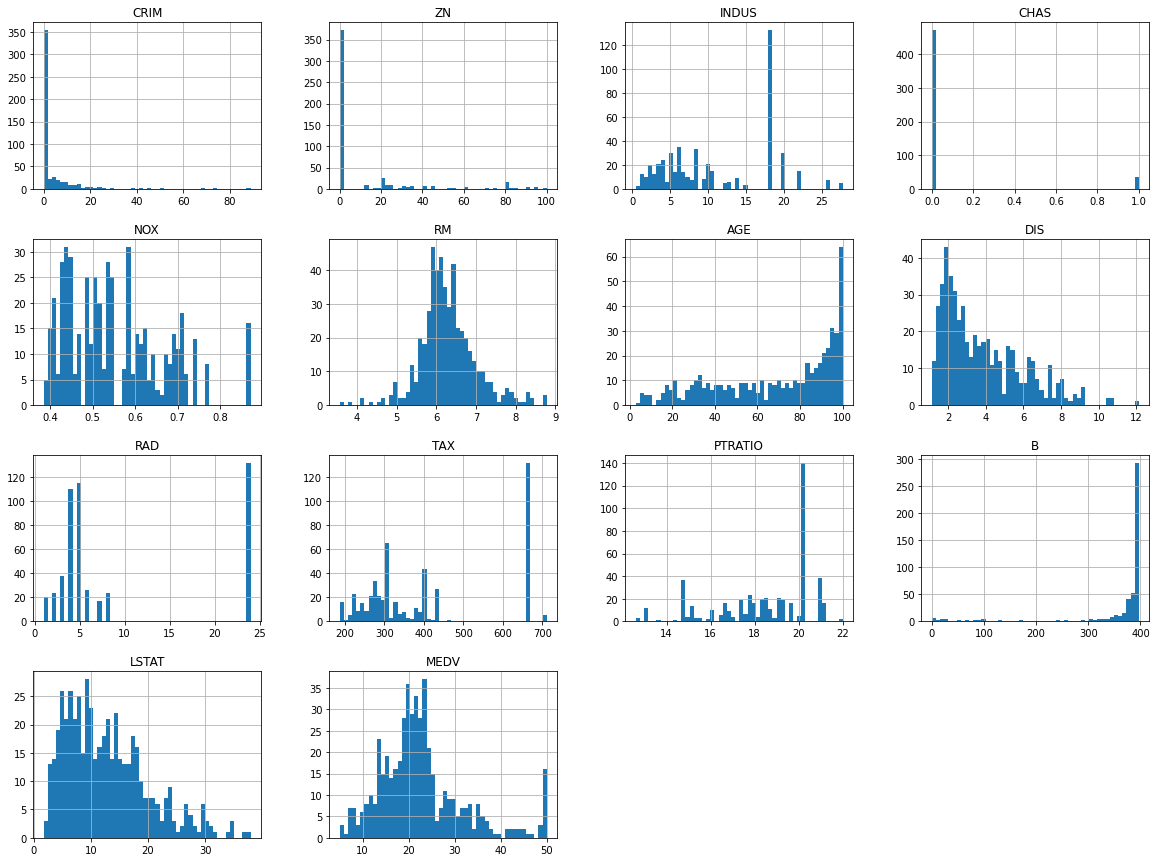

In [ ]:
#apresentar dados em gráficos
%matplotlib inline
import matplotlib.pyplot as plt
dados.hist(bins=50, figsize=(20,15))
plt.show()

# Preparação do conjunto de dados

In [ ]:
# Gerando matriz esparsa do campo RAD - categorias 
matrizEsparsaRAD = pd.get_dummies(dados.RAD, prefix='CatRAD')
matrizEsparsaRAD.sample(n=5, random_state=seed)

,CatRAD_1,CatRAD_2,CatRAD_3,CatRAD_4,CatRAD_5,CatRAD_6,CatRAD_7,CatRAD_8,CatRAD_24
384,0,0,0,0,0,0,0,0,1
315,0,0,0,1,0,0,0,0,0
146,0,0,0,0,1,0,0,0,0
502,1,0,0,0,0,0,0,0,0
399,0,0,0,0,0,0,0,0,1


In [ ]:
# Deleta a coluna original do campo RAD
dadosPreparados = dados.drop(columns='RAD')

In [ ]:
#Junta os dados com a matriz esparsa
dadosPreparados = dadosPreparados.merge(matrizEsparsaRAD, left_index=True, right_index=True)
dadosPreparados.sample(n= 20, random_state=seed)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,CatRAD_1,CatRAD_2,CatRAD_3,CatRAD_4,CatRAD_5,CatRAD_6,CatRAD_7,CatRAD_8,CatRAD_24
384,20.08490,0.0,18.10,0,0.7000,4.368,91.2,1.4395,666,20.2,285.83,30.63,8.8,0,0,0,0,0,0,0,0,1
315,0.25356,0.0,9.90,0,0.5440,5.705,77.7,3.9450,304,18.4,396.42,11.50,16.2,0,0,0,1,0,0,0,0,0
146,2.15505,0.0,19.58,0,0.8710,5.628,100.0,1.5166,403,14.7,169.27,16.65,15.6,0,0,0,0,1,0,0,0,0
502,0.04527,0.0,11.93,0,0.5730,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6,1,0,0,0,0,0,0,0,0
399,9.91655,0.0,18.10,0,0.6930,5.852,77.8,1.5004,666,20.2,338.16,29.97,6.3,0,0,0,0,0,0,0,0,1
137,0.35233,0.0,21.89,0,0.6240,6.454,98.4,1.8498,437,21.2,394.08,14.59,17.1,0,0,0,1,0,0,0,0,0
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,666,20.2,2.52,23.29,13.4,0,0,0,0,0,0,0,0,1
467,4.42228,0.0,18.10,0,0.5840,6.003,94.5,2.5403,666,20.2,331.29,21.32,19.1,0,0,0,0,0,0,0,0,1
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,307,17.4,385.91,2.47,41.7,0,0,0,0,0,0,0,1,0
386,24.39380,0.0,18.10,0,0.7000,4.652,100.0,1.4672,666,20.2,396.90,28.28,10.5,0,0,0,0,0,0,0,0,1


# Seleção/Análise das Features
Criarei vários conjuntos de dados.
Depois passarei a avaliar cada um...

In [ ]:
#Análise da Variância
dadosPreparados.var()

CRIM            73.986578
ZN             543.936814
INDUS           47.064442
CHAS             0.064513
NOX              0.013428
RM               0.493671
AGE            792.358399
DIS              4.434015
TAX          28404.759488
PTRATIO          4.686989
B             8334.752263
LSTAT           50.994760
MEDV            84.586724
CatRAD_1         0.038039
CatRAD_2         0.045271
CatRAD_3         0.069597
CatRAD_4         0.170469
CatRAD_5         0.175968
CatRAD_6         0.048840
CatRAD_7         0.032532
CatRAD_8         0.045271
CatRAD_24        0.193198
dtype: float64

In [ ]:
#Features com variância próximas a zero não interferem, serão excluídas: CHAS e NOX
#Apesar de várias caterorias do RAD serem próximas a zero, acho que não faz sentido excluir algumas...
dadosFeatuers1 = dadosPreparados.drop(columns=['NOX', 'CHAS'])
dadosFeatuers1.sample(n=10)

,CRIM,ZN,INDUS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,CatRAD_1,CatRAD_2,CatRAD_3,CatRAD_4,CatRAD_5,CatRAD_6,CatRAD_7,CatRAD_8,CatRAD_24
89,0.05302,0.0,3.41,7.079,63.1,3.4145,270,17.8,396.06,5.70,28.7,0,1,0,0,0,0,0,0,0
240,0.11329,30.0,4.93,6.897,54.3,6.3361,300,16.6,391.25,11.38,22.0,0,0,0,0,0,1,0,0,0
333,0.05083,0.0,5.19,6.316,38.1,6.4584,224,20.2,389.71,5.68,22.2,0,0,0,0,1,0,0,0,0
290,0.03502,80.0,4.95,6.861,27.9,5.1167,245,19.2,396.90,3.33,28.5,0,0,0,1,0,0,0,0,0
116,0.13158,0.0,10.01,6.176,72.5,2.7301,432,17.8,393.30,12.04,21.2,0,0,0,0,0,1,0,0,0
273,0.22188,20.0,6.96,7.691,51.8,4.3665,223,18.6,390.77,6.58,35.2,0,0,1,0,0,0,0,0,0
100,0.14866,0.0,8.56,6.727,79.9,2.7778,384,20.9,394.76,9.42,27.5,0,0,0,0,1,0,0,0,0
219,0.11425,0.0,13.89,6.373,92.4,3.3633,276,16.4,393.74,10.50,23.0,0,0,0,0,1,0,0,0,0
137,0.35233,0.0,21.89,6.454,98.4,1.8498,437,21.2,394.08,14.59,17.1,0,0,0,1,0,0,0,0,0
209,0.43571,0.0,10.59,5.344,100.0,3.8750,277,18.6,396.90,23.09,20.0,0,0,0,1,0,0,0,0,0


<function matplotlib.pyplot.show>

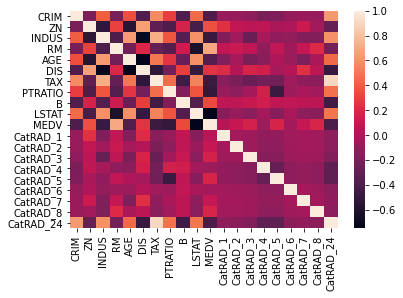

In [ ]:
#Análise da Correlação

#O esperado é uma correlação alta. O que tiver correlação baixa pode ser excluído. Tipicamente correlações superiores a 0.8 (em módulo) ?

#Visualizando graficamente
import seaborn as sn
import matplotlib.pyplot as plt2
sn.heatmap(dadosFeatuers1.corr())
plt2.show

In [ ]:
#Análise da Correlação das Features com o objetivo, neste caso preço médio do imóveis (MEDV)
corr = abs(dadosFeatuers1.corr()["MEDV"])
corr

CRIM         0.388305
ZN           0.360445
INDUS        0.483725
RM           0.695360
AGE          0.376955
DIS          0.249929
TAX          0.468536
PTRATIO      0.507787
B            0.333461
LSTAT        0.737663
MEDV         1.000000
CatRAD_1     0.040453
CatRAD_2     0.104444
CatRAD_3     0.167352
CatRAD_4     0.065711
CatRAD_5     0.187356
CatRAD_6     0.039411
CatRAD_7     0.092802
CatRAD_8     0.190053
CatRAD_24    0.396297
Name: MEDV, dtype: float64

In [ ]:
#O que tiver correlação baixa pode ser excluído. Neste caso estou assumindo como ponto de corte 0,5
print ("Features a serem excluídas")
#i is index 
#v is value
dadosFeatuers2 = dadosFeatuers1;
for i, v in corr.items():
  if v<0.5:
     dadosFeatuers2 = dadosFeatuers2.drop(columns=i)
     print("Excluído: ",  i , v)
           
print ("fim das Features excluídas")
print ()
print ('Amostra das Features atuais')
dadosFeatuers2.sample(n=10)

Features a serem excluídas
Excluído:  CRIM 0.3883046085868114
Excluído:  ZN 0.3604453424505447
Excluído:  INDUS 0.483725160028373
Excluído:  AGE 0.3769545650045959
Excluído:  DIS 0.24992873408590394
Excluído:  TAX 0.46853593356776646
Excluído:  B 0.33346081965706653
Excluído:  CatRAD_1 0.04045262520370776
Excluído:  CatRAD_2 0.10444370010186704
Excluído:  CatRAD_3 0.1673518941659104
Excluído:  CatRAD_4 0.06571054183670805
Excluído:  CatRAD_5 0.18735551543537654
Excluído:  CatRAD_6 0.03941136961778513
Excluído:  CatRAD_7 0.09280191125641336
Excluído:  CatRAD_8 0.19005275268298916
Excluído:  CatRAD_24 0.39629679553115943
fim das Features excluídas

Amostra das Features atuais


,RM,PTRATIO,LSTAT,MEDV
466,5.952,20.2,17.15,19.0
311,6.122,18.4,5.98,22.1
66,5.787,16.1,10.24,19.4
486,6.114,20.2,14.98,19.1
428,6.193,20.2,21.52,11.0
259,6.842,13.0,6.90,30.1
280,7.820,14.9,3.76,45.4
425,5.896,20.2,24.39,8.3
396,6.405,20.2,19.37,12.5
344,6.874,17.6,4.61,31.2


# Separação do conjunto em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
#Features2
dadosTreinamento_F2, dadosTeste_F2 = train_test_split(dadosFeatuers2, test_size=0.2, random_state=seed)
#Features1
dadosTreinamento_F1, dadosTeste_F1 = train_test_split(dadosFeatuers1, test_size=0.2, random_state=seed)
#Features Originais, preparados 
dadosTreinamento_Ori, dadosTeste_Ori = train_test_split(dadosPreparados, test_size=0.2, random_state=seed)


# Treinando os modelos

Comparar ao menos 3 modelos de machine learning e algumas configuração de hiperparâmetros, justificando a escola do melhor modelo.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Métrica a ser usada: Erro médio absoluto MAE (mean absolute error), definida pelo especialista
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Também R2, Nesse caso, expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. Por exemplo, um R² = 0,8234 significa que o modelo linear explica 82,34% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear. 
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_predict
from math import sqrt

cross_validation = KFold (n_splits=10, shuffle=True, random_state=seed) #aqui fiquei em dúvida, pelo que li na documentação, usando o kfold não seria necessário separar o DataSet em Treino e teste, ele mesmo faz isso. Mas já que eu separei vou anter aqui...
avaliacaoModelos = [] 


In [ ]:
avaliacaoModelos = []
# MODELO: Regressão Linear
from sklearn.linear_model import LinearRegression
modelo = "Regressão Linear"
pipeline = make_pipeline (StandardScaler(), LinearRegression())

#Treinando e avaliando Feature 2
origem = "Features 2 (RM, PTRATIO, LSTAT)"
X = dadosTreinamento_F2.drop(columns="MEDV")
y = dadosTreinamento_F2["MEDV"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


#Treinando e avaliando Feature 1
origem = "Features 1 (Tudo menos 'NOX', 'CHAS')"
X = dadosTreinamento_F1.drop(columns="MEDV")
y = dadosTreinamento_F1["MEDV"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])

#Treinando e avaliando Todas as Features 
origem = "Todas as Features"
X = dadosTreinamento_Ori.drop(columns="MEDV")
y = dadosTreinamento_Ori["MEDV"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


In [ ]:
# MODELO: KNeighborsRegressor
from sklearn import neighbors
modelo = "KNeighborsRegressor"
pipeline = make_pipeline (StandardScaler(), neighbors.KNeighborsRegressor(n_neighbors=10))

#Treinando e avaliando Feature 2
origem = "Features 2 (RM, PTRATIO, LSTAT)"
X = dadosTreinamento_F2.drop(columns="MEDV")
y = dadosTreinamento_F2["MEDV"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


#Treinando e avaliando Feature 1
origem = "Features 1 (Tudo menos 'NOX', 'CHAS')"
X = dadosTreinamento_F1.drop(columns="MEDV")
y = dadosTreinamento_F1["MEDV"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])

#Treinando e avaliando Todas as Features 
origem = "Todas as Features"
X = dadosTreinamento_Ori.drop(columns="MEDV")
y = dadosTreinamento_Ori["MEDV"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


In [ ]:
# MODELO: 
from sklearn.ensemble import RandomForestRegressor
modelo = "RandomForestRegressor"
pipeline = make_pipeline (StandardScaler(), RandomForestRegressor(n_estimators=10, random_state=seed))

#Treinando e avaliando Feature 2
origem = "Features 2 (RM, PTRATIO, LSTAT)"
X = dadosTreinamento_F2.drop(columns="MEDV")
y = dadosTreinamento_F2["MEDV"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


#Treinando e avaliando Feature 1
origem = "Features 1 (Tudo menos 'NOX', 'CHAS')"
X = dadosTreinamento_F1.drop(columns="MEDV")
y = dadosTreinamento_F1["MEDV"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])

#Treinando e avaliando Todas as Features 
origem = "Todas as Features"
X = dadosTreinamento_Ori.drop(columns="MEDV")
y = dadosTreinamento_Ori["MEDV"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


In [ ]:
# MODELO: 
from sklearn.tree import DecisionTreeRegressor
modelo = "DecisionTreeRegressor"
pipeline = make_pipeline (StandardScaler(), DecisionTreeRegressor() )

#Treinando e avaliando Feature 2
origem = "Features 2 (RM, PTRATIO, LSTAT)"
X = dadosTreinamento_F2.drop(columns="MEDV")
y = dadosTreinamento_F2["MEDV"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


#Treinando e avaliando Feature 1
origem = "Features 1 (Tudo menos 'NOX', 'CHAS')"
X = dadosTreinamento_F1.drop(columns="MEDV")
y = dadosTreinamento_F1["MEDV"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])

#Treinando e avaliando Todas as Features 
origem = "Todas as Features"
X = dadosTreinamento_Ori.drop(columns="MEDV")
y = dadosTreinamento_Ori["MEDV"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
avaliacaoModelos.append([modelo, origem, MAE, RMSE, R2])


In [ ]:
df_res = pd.DataFrame(avaliacaoModelos, columns=["Modelo ML", "Features", "MAE", "RMSE", "R2"]) #Armazena o resultado dos testes preliminares
print ("========================================")
print("Segundo o especialista, o melhor parametro de avaliação é o MAE (Erro Médio Absoluto)")
print("Então o melhor modelo está no topo da lista (segundo uma análise preliminar)")
print ("========================================")
df_res.sort_values(by=['MAE', 'R2'])

Segundo o especialista, o melhor parametro de avaliação é o MAE (Erro Médio Absoluto)
Então o melhor modelo está no topo da lista (segundo uma análise preliminar)


,Modelo ML,Features,MAE,RMSE,R2
8,RandomForestRegressor,Todas as Features,2.318,3.549,84.39
7,RandomForestRegressor,"Features 1 (Tudo menos 'NOX', 'CHAS')",2.437,3.727,82.79
11,DecisionTreeRegressor,Todas as Features,2.833,4.198,78.16
10,DecisionTreeRegressor,"Features 1 (Tudo menos 'NOX', 'CHAS')",2.971,4.535,74.51
3,KNeighborsRegressor,"Features 2 (RM, PTRATIO, LSTAT)",2.978,4.644,73.28
6,RandomForestRegressor,"Features 2 (RM, PTRATIO, LSTAT)",3.179,4.746,72.09
4,KNeighborsRegressor,"Features 1 (Tudo menos 'NOX', 'CHAS')",3.442,5.174,66.82
2,Regressão Linear,Todas as Features,3.493,5.075,68.08
1,Regressão Linear,"Features 1 (Tudo menos 'NOX', 'CHAS')",3.539,5.190,66.62
5,KNeighborsRegressor,Todas as Features,3.675,5.566,61.61


# Ajustando o modelo


In [ ]:
#demora, mas menos de 1 minuto
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [20, 25, 30, 35, 40], 'max_features': [ 8, 9, 10, 11, 12]},
    {'bootstrap': [False], 'n_estimators': [20, 25, 30, 35, 40], 'max_features': [ 8, 9, 10, 11, 12]},
  ]
X = dadosPreparados.drop(columns="MEDV")
y = dadosPreparados["MEDV"]
forest_reg = RandomForestRegressor(random_state=seed)


grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True)

grid_search.fit(X, y)

NameError: ignored

In [ ]:
grid_search.best_params_

{'max_features': 9, 'n_estimators': 40}

# Teste Final

Fazer teste final para obter um erro aproximado, neste caso, MAE.
{'max_features': 11, 'n_estimators': 30}

In [ ]:
# Melhor modelo: RandomForestRegressor 	Todas as Features 	2.318 	3.549 	84.39 
from sklearn.ensemble import RandomForestRegressor
modelo = "RandomForestRegressor"
pipeline = make_pipeline (StandardScaler(), RandomForestRegressor(n_estimators=30, max_features=11, bootstrap=True, random_state=seed))

#Treinando e avaliando Feature 2
origem = "Todas as Features"
X = dadosPreparados.drop(columns="MEDV")
y = dadosPreparados["MEDV"]
predicao_y = cross_val_predict (pipeline, X, y, cv=cross_validation)
MAE = round((mean_absolute_error(y,predicao_y)),3)
RMSE = round(sqrt(mean_squared_error(y,predicao_y)),3)
R2 = round(r2_score(y,predicao_y)*100,2)
print("Melhor modelo: RandomForestRegressor  Testes preliminares:	Todas as Features 	2.318 	3.549 	84.39 ")
print([modelo, origem, MAE, RMSE, R2])

Melhor modelo: RandomForestRegressor  Testes preliminares:	Todas as Features 	2.318 	3.549 	84.39 
['RandomForestRegressor', 'Todas as Features', 2.118, 3.118, 88.48]
